# Multi_Class_Prediction_Rajan_Ghimire_2024_09_27


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


#Multi_Class_Prediction_Rajan_Ghimire_2024_09_27

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

In [4]:
df= pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Assignment_5/train.csv")
df_test = pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Assignment_5/test.csv")

In [5]:
# Check for missing values
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
# Check for missing values in our test data
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
# Check for duplicated values

duplicates = df.duplicated()

# Count the number of duplicated rows
num_duplicates = duplicates.sum()

print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 0


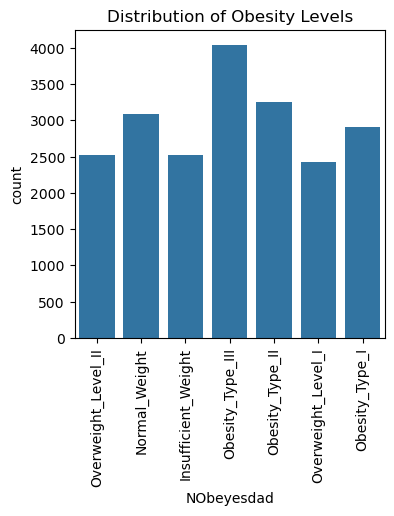

In [8]:
# Visualize the distribution of the target variable (NObeyesdad)

plt.figure(figsize=(4, 4))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=90)
plt.show()

In [9]:
df.head()


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
df_test.head()


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [11]:
df=df.drop('id', axis=1)

In [12]:
test_id= df_test['id']

In [13]:
df_test=df_test.drop('id', axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   FAVC                            13840 non-null  object 
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  object 
 12  FAF                             

In [16]:
df.nunique()


Gender                               2
Age                               1703
Height                            1833
Weight                            1979
family_history_with_overweight       2
FAVC                                 2
FCVC                               934
NCP                                689
CAEC                                 4
SMOKE                                2
CH2O                              1506
SCC                                  2
FAF                               1360
TUE                               1297
CALC                                 3
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [17]:
categorical_columns=df.select_dtypes(include=['object'])
categorical_columns.columns


Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [18]:
categorical_columns_test=df_test.select_dtypes(include=['object'])
categorical_columns_test.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [19]:
df['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [20]:
target_dictionary = {'Insufficient_Weight':'0',
                   'Normal_Weight':'1', 'Overweight_Level_I': '2', 'Overweight_Level_II': '3', 'Obesity_Type_I' : '4' , 'Obesity_Type_II' : '5', 'Obesity_Type_III': '6'}
                    

In [21]:
df['NObeyesdad']= df['NObeyesdad'].replace(target_dictionary).astype('int64')

In [22]:
df['NObeyesdad'].unique()

array([3, 1, 0, 6, 5, 2, 4], dtype=int64)

In [23]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [24]:
target_dictionary = {'Bike':'0',
                   'Walking':'1', 'Motorbike': '2', 'Automobile': '3', 'Public_Transportation' : '4' }
                    

In [25]:
df['MTRANS']= df['MTRANS'].replace(target_dictionary).astype('int')
df_test['MTRANS']= df_test['MTRANS'].replace(target_dictionary).astype('int')

In [26]:
df['MTRANS'].unique()

array([4, 3, 1, 2, 0])

In [27]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object)

In [28]:
target_dictionary = {'no':'0',
                   'Frequently':'1', 'Always': '2', 'Sometimes': '3' }

df['CAEC']= df['CAEC'].replace(target_dictionary).astype('int')
df_test['CAEC']= df_test['CAEC'].replace(target_dictionary).astype('int')
df['CAEC'].unique()

array([3, 1, 0, 2])

In [29]:
df['CALC'].unique()

array(['Sometimes', 'no', 'Frequently'], dtype=object)

In [30]:
target_dictionary = {'no':'0',
                   'Frequently':'2', 'Always': '3', 'Sometimes': '1' }

df['CALC']= df['CALC'].replace(target_dictionary).astype('int')
df_test['CALC']=df_test['CALC'].replace(target_dictionary).astype('int')
df['CALC'].unique()

array([1, 0, 2])

In [31]:
categorical_columns.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [32]:
categorical_columns=df.select_dtypes(include=['object'])
categorical_columns.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC'], dtype='object')

In [33]:
categorical_columns_test=df.select_dtypes(include=['object'])
categorical_columns_test.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC'], dtype='object')

In [34]:
df=pd.get_dummies(df)

In [35]:
df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes'],
      dtype='object')

In [36]:
df_test=pd.get_dummies(df_test)
df_test.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 20758 non-null  float64
 1   Height                              20758 non-null  float64
 2   Weight                              20758 non-null  float64
 3   FCVC                                20758 non-null  float64
 4   NCP                                 20758 non-null  float64
 5   CAEC                                20758 non-null  int32  
 6   CH2O                                20758 non-null  float64
 7   FAF                                 20758 non-null  float64
 8   TUE                                 20758 non-null  float64
 9   CALC                                20758 non-null  int32  
 10  MTRANS                              20758 non-null  int32  
 11  NObeyesdad                          20758

In [38]:
df=df.drop(columns=['family_history_with_overweight_no', 'SMOKE_no', 'SCC_yes','Gender_Male','FAVC_no'])                                                              

In [39]:
df_test=df_test.drop(columns=['family_history_with_overweight_no', 'SMOKE_no', 'SCC_yes','Gender_Male','FAVC_no'])                                                              

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 20758 non-null  float64
 1   Height                              20758 non-null  float64
 2   Weight                              20758 non-null  float64
 3   FCVC                                20758 non-null  float64
 4   NCP                                 20758 non-null  float64
 5   CAEC                                20758 non-null  int32  
 6   CH2O                                20758 non-null  float64
 7   FAF                                 20758 non-null  float64
 8   TUE                                 20758 non-null  float64
 9   CALC                                20758 non-null  int32  
 10  MTRANS                              20758 non-null  int32  
 11  NObeyesdad                          20758

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 13840 non-null  float64
 1   Height                              13840 non-null  float64
 2   Weight                              13840 non-null  float64
 3   FCVC                                13840 non-null  float64
 4   NCP                                 13840 non-null  float64
 5   CAEC                                13840 non-null  int32  
 6   CH2O                                13840 non-null  float64
 7   FAF                                 13840 non-null  float64
 8   TUE                                 13840 non-null  float64
 9   CALC                                13840 non-null  int32  
 10  MTRANS                              13840 non-null  int32  
 11  Gender_Female                       13840

In [42]:
df['BMI_Sqrt']= (( df['Weight']) ** 0.5)/(df['Height']**1)

In [43]:
df_test['BMI_Sqrt']= (( df_test['Weight']) ** 0.5)/(df['Height']**1)

In [44]:
# Compute the correlation Matrix
df = df.astype(float)
df_test = df_test.astype(float)

corr_matrix=df.corr()

In [45]:
corr_matrix

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_no,BMI_Sqrt
Age,1.000000,-0.011713,0.283381,0.034414,-0.048479,0.199334,-0.016325,-0.192259,-0.296154,0.070323,-0.332291,0.356211,-0.066530,0.261575,0.056848,0.056006,0.108855,0.339627
Height,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.136845,0.183706,0.295278,0.076433,0.089138,-0.069900,0.150141,-0.623507,0.228137,0.115566,0.069748,0.095923,0.101907
Weight,0.283381,0.416677,1.000000,0.245682,0.095947,0.416091,0.317914,-0.084845,-0.086471,0.216673,0.085919,0.921250,-0.118613,0.514147,0.228770,0.040416,0.185116,0.940355
FCVC,0.034414,-0.071546,0.245682,1.000000,0.113349,0.028185,0.101299,-0.089822,-0.147843,0.128793,0.068414,0.272933,0.312766,0.047756,0.006952,-0.012191,-0.022120,0.270943
NCP,-0.048479,0.191383,0.095947,0.113349,1.000000,0.002170,0.080949,0.100871,0.067459,0.099421,-0.040851,0.027227,-0.039468,0.044778,0.011522,0.006820,-0.006633,0.033361
CAEC,0.199334,0.136845,0.416091,0.028185,0.002170,1.000000,0.121849,-0.097974,-0.007822,0.044553,-0.014859,0.437162,-0.045358,0.335975,0.127701,-0.003756,0.122454,0.425402
CH2O,-0.016325,0.183706,0.317914,0.101299,0.080949,0.121849,1.000000,0.082932,-0.010654,0.082735,0.028445,0.273154,-0.053298,0.191588,0.039167,-0.023475,0.031720,0.290857
FAF,-0.192259,0.295278,-0.084845,-0.089822,0.100871,-0.097974,0.082932,1.000000,0.021213,-0.090076,-0.095286,-0.234745,-0.238399,-0.094414,-0.067030,0.008374,-0.061828,-0.210465
TUE,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.007822,-0.010654,0.021213,1.000000,-0.079790,0.077647,-0.121009,-0.058696,0.005762,0.034843,-0.016093,0.007917,-0.120528
CALC,0.070323,0.089138,0.216673,0.128793,0.099421,0.044553,0.082735,-0.090076,-0.079790,1.000000,0.024604,0.189361,0.037345,-0.002330,0.080184,0.023254,-0.000208,0.194256


In [46]:
# Sort the correlation matrix with respect to the column of interest
sorted_correlation= corr_matrix['NObeyesdad'].sort_index(ascending=True)

In [47]:
# Extrack the columns in order of their correlation with the column of interest
correlated_columns=sorted_correlation.index


In [48]:
correlated_columns

Index(['Age', 'BMI_Sqrt', 'CAEC', 'CALC', 'CH2O', 'FAF', 'FAVC_yes', 'FCVC',
       'Gender_Female', 'Height', 'MTRANS', 'NCP', 'NObeyesdad', 'SCC_no',
       'SMOKE_yes', 'TUE', 'Weight', 'family_history_with_overweight_yes'],
      dtype='object')

In [49]:
subset_corr_matrix = corr_matrix.loc[correlated_columns, correlated_columns]
subset_corr_matrix

,Age,BMI_Sqrt,CAEC,CALC,CH2O,FAF,FAVC_yes,FCVC,Gender_Female,Height,MTRANS,NCP,NObeyesdad,SCC_no,SMOKE_yes,TUE,Weight,family_history_with_overweight_yes
Age,1.000000,0.339627,0.199334,0.070323,-0.016325,-0.192259,0.056848,0.034414,-0.066530,-0.011713,-0.332291,-0.048479,0.356211,0.108855,0.056006,-0.296154,0.283381,0.261575
BMI_Sqrt,0.339627,1.000000,0.425402,0.194256,0.290857,-0.210465,0.212433,0.270943,0.066347,0.101907,0.101925,0.033361,0.963909,0.178804,0.015481,-0.120528,0.940355,0.511946
CAEC,0.199334,0.425402,1.000000,0.044553,0.121849,-0.097974,0.127701,0.028185,-0.045358,0.136845,-0.014859,0.002170,0.437162,0.122454,-0.003756,-0.007822,0.416091,0.335975
CALC,0.070323,0.194256,0.044553,1.000000,0.082735,-0.090076,0.080184,0.128793,0.037345,0.089138,0.024604,0.099421,0.189361,-0.000208,0.023254,-0.079790,0.216673,-0.002330
CH2O,-0.016325,0.290857,0.121849,0.082735,1.000000,0.082932,0.039167,0.101299,-0.053298,0.183706,0.028445,0.080949,0.273154,0.031720,-0.023475,-0.010654,0.317914,0.191588
FAF,-0.192259,-0.210465,-0.097974,-0.090076,0.082932,1.000000,-0.067030,-0.089822,-0.238399,0.295278,-0.095286,0.100871,-0.234745,-0.061828,0.008374,0.021213,-0.084845,-0.094414
FAVC_yes,0.056848,0.212433,0.127701,0.080184,0.039167,-0.067030,1.000000,0.006952,-0.021812,0.115566,0.091496,0.011522,0.215401,0.111897,-0.016009,0.034843,0.228770,0.152154
FCVC,0.034414,0.270943,0.028185,0.128793,0.101299,-0.089822,0.006952,1.000000,0.312766,-0.071546,0.068414,0.113349,0.272933,-0.022120,-0.012191,-0.147843,0.245682,0.047756
Gender_Female,-0.066530,0.066347,-0.045358,0.037345,-0.053298,-0.238399,-0.021812,0.312766,1.000000,-0.623507,0.151283,-0.039468,0.067699,-0.061442,-0.063349,-0.058696,-0.118613,-0.095786
Height,-0.011713,0.101907,0.136845,0.089138,0.183706,0.295278,0.115566,-0.071546,-0.623507,1.000000,-0.069900,0.191383,0.150141,0.095923,0.069748,0.076433,0.416677,0.228137


In [50]:
# set up metplob fighure 

plt.figure(figsize=(16,16))

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

<Axes: >

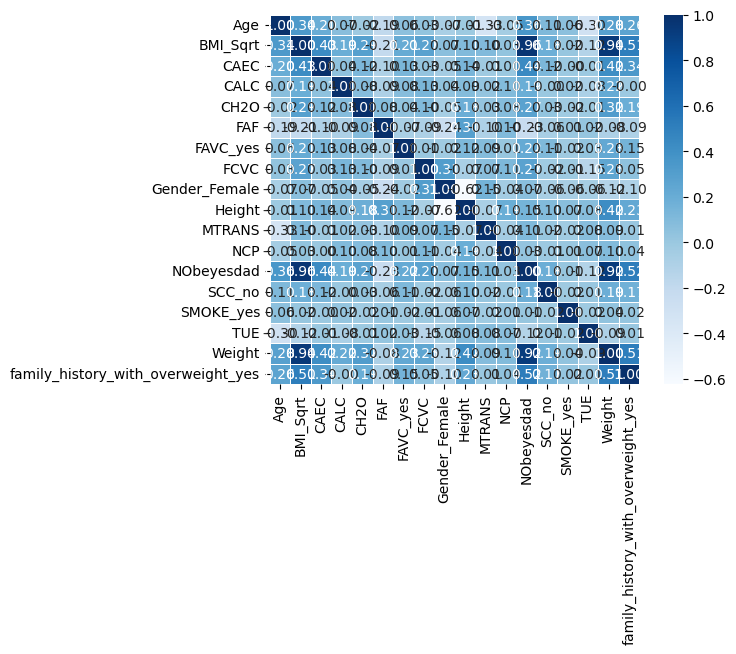

In [51]:
# creating a heatmap
sns.heatmap(subset_corr_matrix, annot =True, cmap ='Blues', linewidths= 0.5, fmt = '.2f', square='True')

Text(0.5, 1.0, 'Correlation Matrix heatmap')

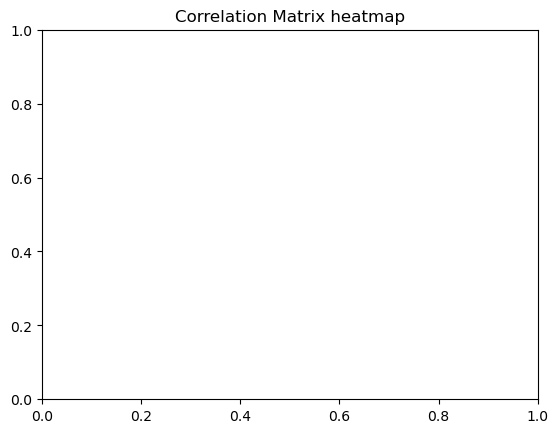

In [52]:
# Add a title 
plt.title("Correlation Matrix heatmap")

In [53]:
#show the plot
plt.show()

In [54]:
x=df.drop('NObeyesdad', axis=1)
y=df['NObeyesdad']

In [55]:
X_train, X_val,y_train, y_val=train_test_split(x,y,test_size=0.2, stratify=y, random_state= 42)


In [56]:
!pip install xgboost


In [57]:
from xgboost import XGBClassifier


In [58]:
from xgboost import XGBClassifier
XGB= XGBClassifier(random_state=3361)
XGB.fit(X_train, y_train)
y_pred=XGB.predict(X_val)

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_pred, y_val))
print("The accuracy for the ML model is {} %".format(round(100*accuracy_score(y_pred, y_val), 2)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       507
           1       0.90      0.87      0.89       636
           2       0.72      0.81      0.76       429
           3       0.84      0.78      0.81       543
           4       0.87      0.89      0.88       569
           5       0.97      0.96      0.96       655
           6       1.00      0.99      1.00       813

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.91      0.90      0.90      4152

The accuracy for the ML model is 90.32 %


Above results shows a classification report with precision, recall, f1-score, and support for different classes (0 to 6). The overall accuracy of the machine learning model is 90.32%.

Class 6 has the highest precision (1.00), recall (0.99), and F1-score (1.00), indicating strong performance.
Class 2 has the lowest F1-score (0.76), suggesting the model struggles more with this class compared to others.
The overall macro and weighted averages for precision, recall, and F1-score are around 0.89-0.91.

In [74]:
from sklearn.model_selection import cross_val_score
XGB_scores= cross_val_score(XGB, X_train, y_train, cv=5)
XGB_scores

array([0.89644792, 0.90545017, 0.90545017, 0.90755796, 0.90846131])

In [80]:
def display_scores(scores):
    print("Scores:", scores.round(4))
    print("Mean:", round(scores.mean(), 4))
    print("standard Deviation:", round(scores.std(),4))

display_scores(XGB_scores)

Scores: [0.8964 0.9055 0.9055 0.9076 0.9085]
Mean: 0.9047
standard Deviation: 0.0043


In [82]:
import joblib
joblib.dump(XGB, 'XGB.joblib')
loaded_model= joblib.load('XGB.joblib')

In [84]:
XGB_Y_pred= loaded_model.predict(df_test)
XGB_Y_pred

array([5, 2, 6, ..., 0, 0, 5], dtype=int64)

In [88]:
model_results =pd.DataFrame({'id':test_id, 'NObeyesdad':XGB_Y_pred})

In [90]:
target_dictionary = {0:'Insufficient_Weight',
                  1: 'Normal_Weight', 2:'Overweight_Level_I', 3: 'Overweight_Level_II', 4:'Obesity_Type_I' ,5: 'Obesity_Type_II', 6:'Obesity_Type_III'}

model_results['NObeyesdad'] = model_results['NObeyesdad'].replace(target_dictionary)
                    

In [94]:
model_results[['id', 'NObeyesdad']].to_csv(submissionOA.csv', index=False)

SyntaxError: unterminated string literal (detected at line 1) (948166632.py, line 1)

In [96]:
print(model_results)

          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762       Obesity_Type_I
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596  Insufficient_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


In [107]:
XGB_result = pd.DataFrame({'id': test_id, 'NObeyesdad': XGB_Y_pred})
XGB_result.to_csv('C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/XGB_result.csv', index=False)